# Training 

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
data 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y

0      1
1      0
2      1
3      0
4      1
      ..
764    0
765    0
766    1
767    0
768    1
Name: Outcome, Length: 769, dtype: int64

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


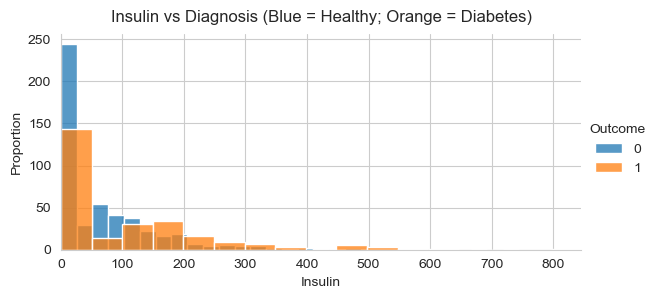

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


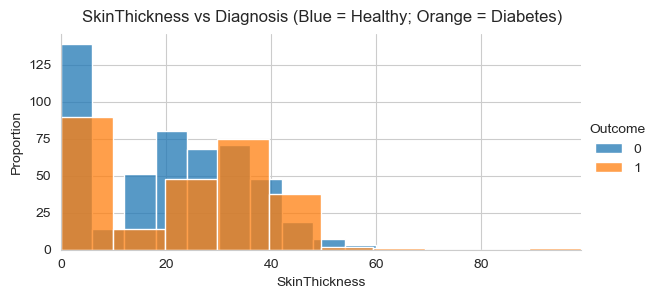

In [16]:
def plotHistogram(values, label, feature, title):
    sns.set_style("whitegrid")
    plotOne = sns.FacetGrid(values, hue=label, aspect=2)
    plotOne.map(sns.histplot, feature, kde=False)
    plotOne.set(xlim=(0, values[feature].max()))
    plotOne.add_legend()
    plotOne.set_axis_labels(feature, 'Proportion')
    plotOne.fig.suptitle(title)
    plt.subplots_adjust(top=0.9)  # Adjust the top margin
    plt.show()



# Example usage
plotHistogram(data, "Outcome", 'Insulin', 'Insulin vs Diagnosis (Blue = Healthy; Orange = Diabetes)')
plotHistogram(data, "Outcome", 'SkinThickness', 'SkinThickness vs Diagnosis (Blue = Healthy; Orange = Diabetes)')


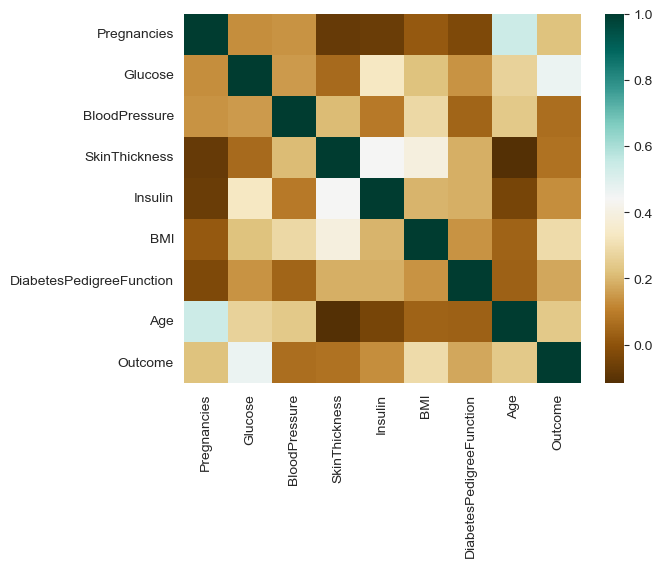

In [17]:
g = sns.heatmap(data.corr(),cmap="BrBG",annot=False)

In [3]:
# Preprocess the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


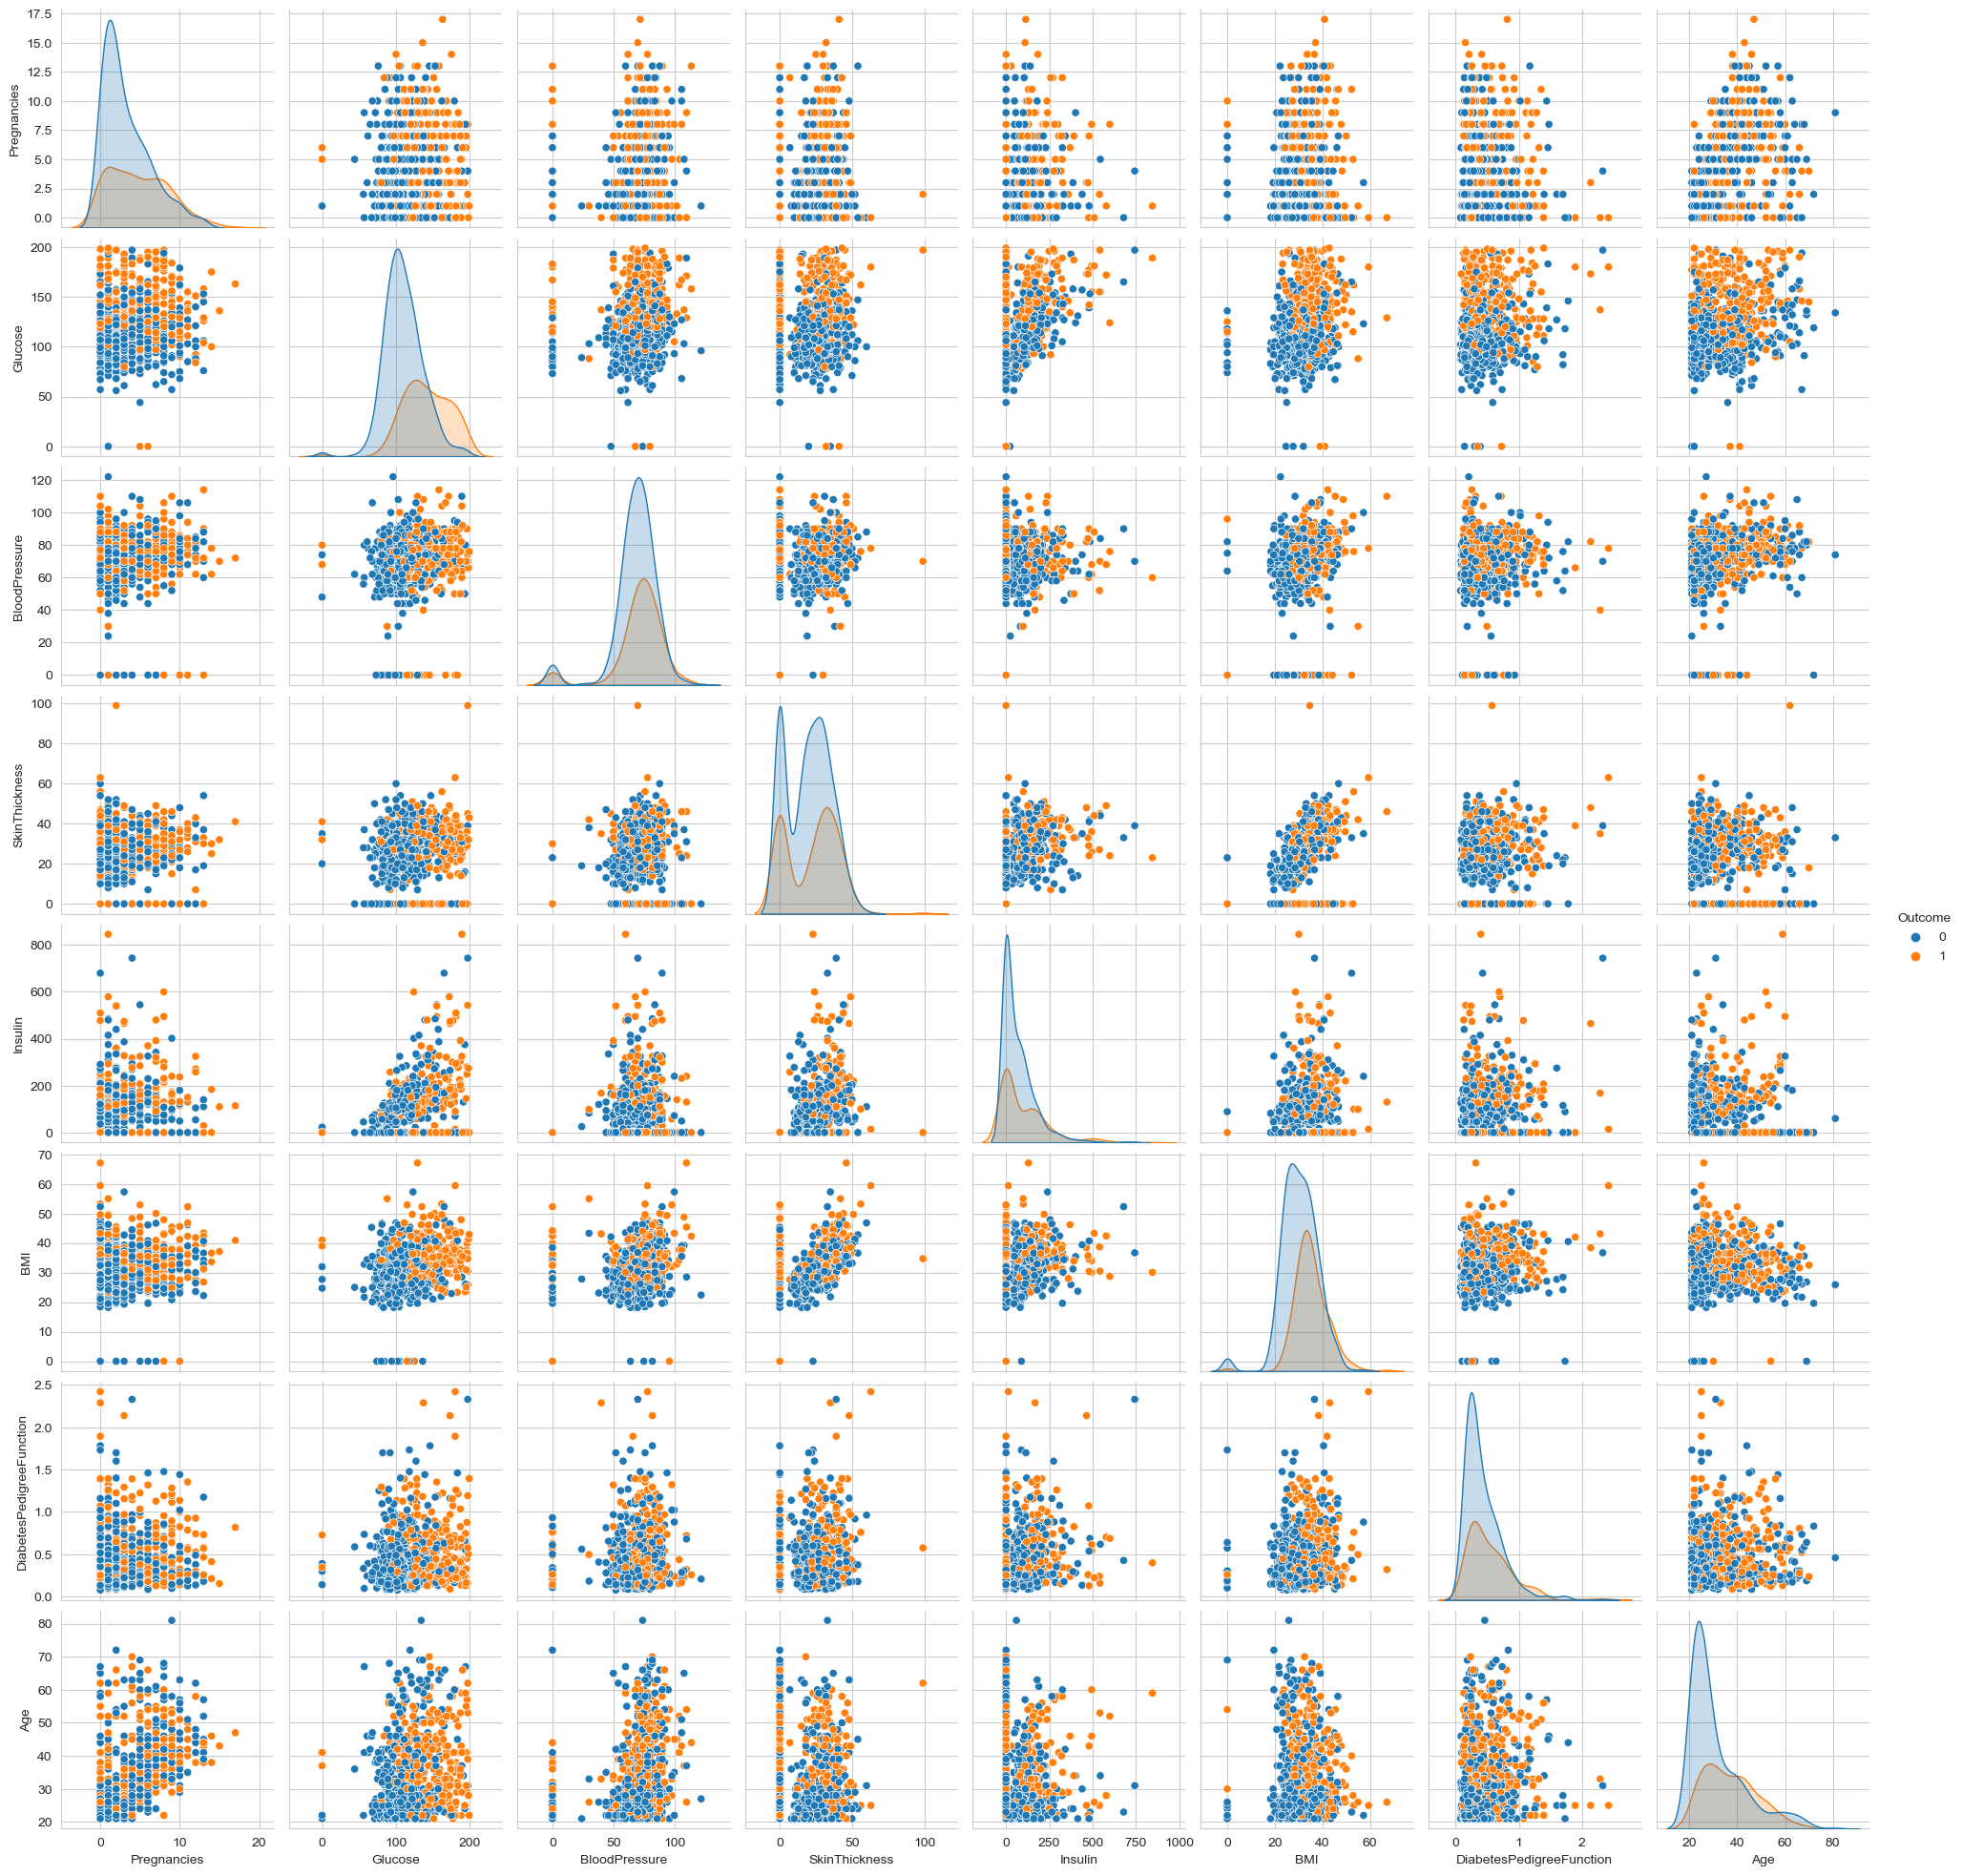

In [20]:
sns.pairplot(data, hue='Outcome')
plt.show()


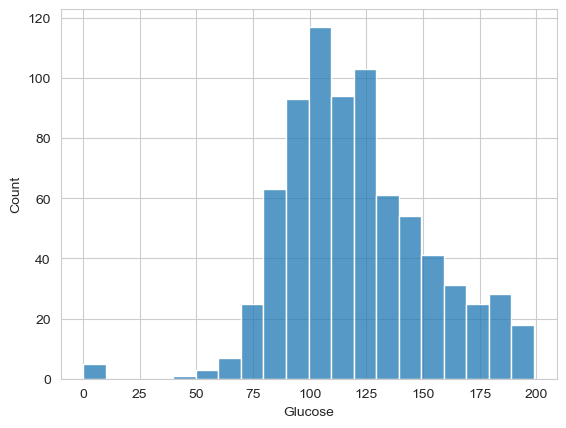

In [22]:
sns.histplot(data['Glucose'], bins=20)
plt.show()



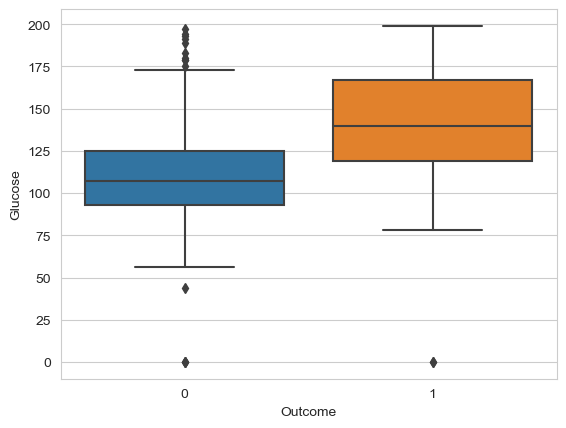

In [23]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.show()


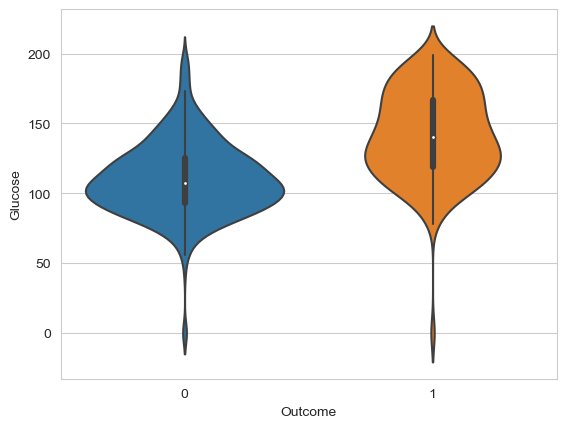

In [24]:
sns.violinplot(x='Outcome', y='Glucose', data=data)
plt.show()


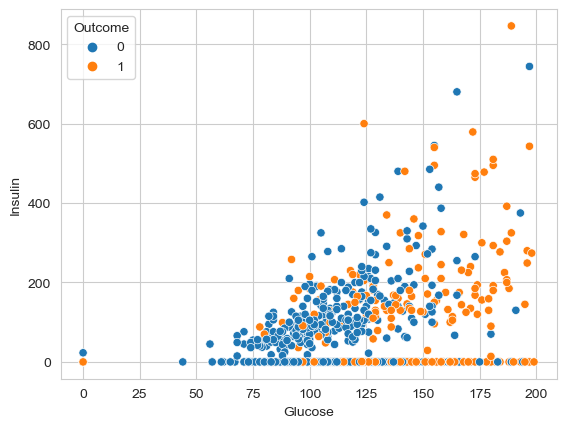

In [25]:
sns.scatterplot(x='Glucose', y='Insulin', data=data, hue='Outcome')
plt.show()


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


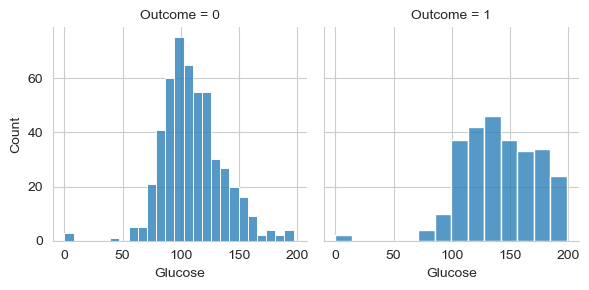

In [26]:
g = sns.FacetGrid(data, col='Outcome')
g.map(sns.histplot, 'Glucose')
plt.show()


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)


In [5]:
# Create the RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))


In [6]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=1000, validation_data=(X_test, y_test))


Epoch 1/200
1/1 [==============================] - 1s 682ms/step - loss: 0.6984 - accuracy: 0.4000 - val_loss: 0.6882 - val_accuracy: 0.5455
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6944 - accuracy: 0.4780 - val_loss: 0.6842 - val_accuracy: 0.5974
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6903 - accuracy: 0.5447 - val_loss: 0.6802 - val_accuracy: 0.6169
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6864 - accuracy: 0.5935 - val_loss: 0.6764 - val_accuracy: 0.6299
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6825 - accuracy: 0.6000 - val_loss: 0.6726 - val_accuracy: 0.6429
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6786 - accuracy: 0.6374 - val_loss: 0.6688 - val_accuracy: 0.6623
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6749 - accuracy: 0.6488 - val_loss: 0.6651 - val_accuracy: 0.6688
Epoch 8/200
1/1 [==

1/1 [==============================] - 0s 12ms/step - loss: 0.5311 - accuracy: 0.7431 - val_loss: 0.5292 - val_accuracy: 0.7403
Epoch 60/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5291 - accuracy: 0.7415 - val_loss: 0.5276 - val_accuracy: 0.7403
Epoch 61/200
1/1 [==============================] - 0s 11ms/step - loss: 0.5271 - accuracy: 0.7415 - val_loss: 0.5261 - val_accuracy: 0.7403
Epoch 62/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5252 - accuracy: 0.7447 - val_loss: 0.5246 - val_accuracy: 0.7468
Epoch 63/200
1/1 [==============================] - 0s 12ms/step - loss: 0.5234 - accuracy: 0.7447 - val_loss: 0.5231 - val_accuracy: 0.7468
Epoch 64/200
1/1 [==============================] - 0s 11ms/step - loss: 0.5215 - accuracy: 0.7463 - val_loss: 0.5217 - val_accuracy: 0.7468
Epoch 65/200
1/1 [==============================] - 0s 11ms/step - loss: 0.5197 - accuracy: 0.7463 - val_loss: 0.5203 - val_accuracy: 0.7403
Epoch 66/200
1/1 [========

1/1 [==============================] - 0s 12ms/step - loss: 0.4614 - accuracy: 0.7805 - val_loss: 0.4920 - val_accuracy: 0.7597
Epoch 118/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4607 - accuracy: 0.7789 - val_loss: 0.4920 - val_accuracy: 0.7597
Epoch 119/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4601 - accuracy: 0.7789 - val_loss: 0.4920 - val_accuracy: 0.7597
Epoch 120/200
1/1 [==============================] - 0s 11ms/step - loss: 0.4594 - accuracy: 0.7789 - val_loss: 0.4920 - val_accuracy: 0.7597
Epoch 121/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4588 - accuracy: 0.7789 - val_loss: 0.4920 - val_accuracy: 0.7597
Epoch 122/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4581 - accuracy: 0.7789 - val_loss: 0.4921 - val_accuracy: 0.7597
Epoch 123/200
1/1 [==============================] - 0s 11ms/step - loss: 0.4575 - accuracy: 0.7789 - val_loss: 0.4921 - val_accuracy: 0.7597
Epoch 124/200
1/1 [=

Epoch 175/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4356 - accuracy: 0.7919 - val_loss: 0.5023 - val_accuracy: 0.7662
Epoch 176/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4353 - accuracy: 0.7919 - val_loss: 0.5026 - val_accuracy: 0.7662
Epoch 177/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4350 - accuracy: 0.7919 - val_loss: 0.5028 - val_accuracy: 0.7662
Epoch 178/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4348 - accuracy: 0.7919 - val_loss: 0.5031 - val_accuracy: 0.7662
Epoch 179/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4345 - accuracy: 0.7919 - val_loss: 0.5033 - val_accuracy: 0.7662
Epoch 180/200
1/1 [==============================] - 0s 11ms/step - loss: 0.4342 - accuracy: 0.7919 - val_loss: 0.5036 - val_accuracy: 0.7597
Epoch 181/200
1/1 [==============================] - 0s 12ms/step - loss: 0.4339 - accuracy: 0.7919 - val_loss: 0.5038 - val_accuracy: 0.7597
Epoch 

In [8]:
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 0s 724us/step - loss: 0.5079 - accuracy: 0.7597
Accuracy: 75.97%


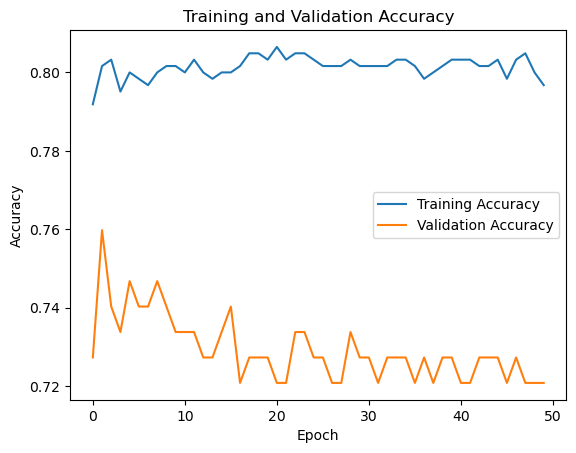

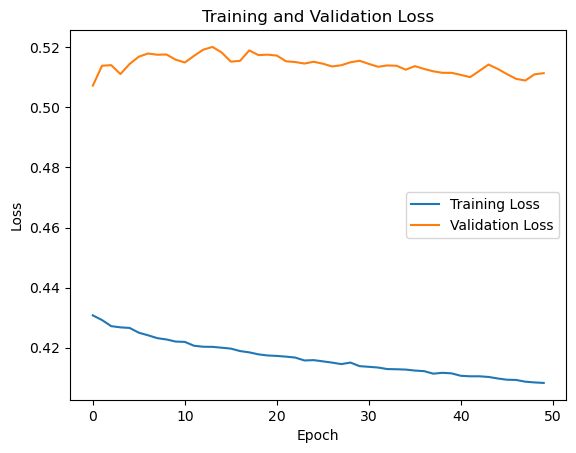

In [10]:
import matplotlib.pyplot as plt



# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [38]:
# Generate synthetic test data
num_samples = 100
num_features = X.shape[1]  # Assuming X is your original dataset
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
synthetic_data = np.random.normal(loc=mean, scale=std, size=(num_samples, num_features))

# Preprocess the synthetic data
synthetic_data_scaled = scaler.transform(synthetic_data)
synthetic_data_reshaped = np.reshape(synthetic_data_scaled, (synthetic_data_scaled.shape[0], 1, synthetic_data_scaled.shape[1]))

# Predict using the model
synthetic_predictions = model.predict(synthetic_data_reshaped)

# Display the synthetic predictions
print(synthetic_predictions)


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 0s 992us/step
[[0.0694892 ]
 [0.88768226]
 [0.08216393]
 [0.42718455]
 [0.32093075]
 [0.0062923 ]
 [0.08585671]
 [0.36615068]
 [0.26451227]
 [0.6166846 ]
 [0.49232107]
 [0.7616517 ]
 [0.45149505]
 [0.13165331]
 [0.7883803 ]
 [0.095905  ]
 [0.30277696]
 [0.01608212]
 [0.15456775]
 [0.91919625]
 [0.69171757]
 [0.46438873]
 [0.69422674]
 [0.40003842]
 [0.00625232]
 [0.89092916]
 [0.06257287]
 [0.37636393]
 [0.8747947 ]
 [0.14610584]
 [0.9826705 ]
 [0.79174984]
 [0.46079174]
 [0.37607467]
 [0.2217767 ]
 [0.5135076 ]
 [0.01189744]
 [0.876659  ]
 [0.10733856]
 [0.19155449]
 [0.5489736 ]
 [0.34383523]
 [0.48196682]
 [0.53705287]
 [0.00457497]
 [0.09835475]
 [0.4966609 ]
 [0.00618756]
 [0.15509602]
 [0.27874088]
 [0.74677974]
 [0.92024016]
 [0.06796638]
 [0.57336295]
 [0.71941394]
 [0.23508139]
 [0.22147015]
 [0.00256781]
 [0.32683593]
 [0.38145262]
 [0.14955011]
 [0.5632236 ]
 [0.37201124]
 [0.73787254]
 [0.69392204]
 [0.44449627]
 [0.44705796]
 [0.38091

In [39]:
# Define the input data
input_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                        [1, 85, 66, 29, 0, 26.6, 0.351, 31],
                        [8, 183, 64, 0, 0, 23.3, 0.672, 32],
                        [1, 89, 66, 23, 94, 28.1, 0.167, 21],
                        [0, 137, 40, 35, 168, 43.1, 2.288, 33]])

# Preprocess the input data
input_data_scaled = scaler.transform(input_data)
input_data_reshaped = np.reshape(input_data_scaled, (input_data_scaled.shape[0], 1, input_data_scaled.shape[1]))

# Predict using the model
predictions = model.predict(input_data_reshaped)

# Display the predictions
for i in range(len(input_data)):
    outcome = "Diabetic" if predictions[i] > 0.5 else "Non-Diabetic"
    print(f"Person {i+1}: {outcome} (Probability: {predictions[i][0]:.4f})")


1/1 [==============================] - 0s 12ms/step
Person 1: Diabetic (Probability: 0.6867)
Person 2: Non-Diabetic (Probability: 0.0233)
Person 3: Diabetic (Probability: 0.8735)
Person 4: Non-Diabetic (Probability: 0.0044)
Person 5: Non-Diabetic (Probability: 0.4458)


/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# Define the input data
input_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50],
                        [1, 85, 66, 29, 0, 26.6, 0.351, 31],
                        [8, 183, 64, 0, 0, 23.3, 0.672, 32],
                        [1, 89, 66, 23, 94, 28.1, 0.167, 21],
                        [0, 137, 40, 35, 168, 43.1, 2.288, 33]])

# Preprocess the input data
input_data_scaled = scaler.transform(input_data)
input_data_reshaped = np.reshape(input_data_scaled, (input_data_scaled.shape[0], 1, input_data_scaled.shape[1]))

# Predict using the model
predictions = model.predict(input_data_reshaped)

# Display the predictions and messages
for i in range(len(input_data)):
    outcome = "Diabetic" if predictions[i] > 0.5 else "Non-Diabetic"
    message = f"Person {i+1}: {outcome} (Probability: {predictions[i][0]:.4f})"
    doctor = "Dr. Smith" if predictions[i] > 0.5 else "Dr. Johnson"
    suggestion = f"Suggested doctor: {doctor}"
    print(message)
    print(suggestion)
    print()


1/1 [==============================] - 0s 12ms/step
Person 1: Diabetic (Probability: 0.6867)
Suggested doctor: Dr. Smith

Person 2: Non-Diabetic (Probability: 0.0233)
Suggested doctor: Dr. Johnson

Person 3: Diabetic (Probability: 0.8735)
Suggested doctor: Dr. Smith

Person 4: Non-Diabetic (Probability: 0.0044)
Suggested doctor: Dr. Johnson

Person 5: Non-Diabetic (Probability: 0.4458)
Suggested doctor: Dr. Johnson



/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
import numpy as np
import pickle

# Load the model
model_path = "/Users/shikarichacha/Desktop/PROJECT /diabetes/rnn_model.pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)

def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    features = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    features = np.reshape(features, (features.shape[0], 1, features.shape[1]))
    prediction = model.predict(features)
    if prediction == 1:
        return "You have a high risk of diabetes. Please consult a doctor."
    else:
        return "Your risk of diabetes is low. No immediate concern."


# Get user inputs
print("Enter the following information to predict your diabetes risk:")
pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

# Predict
message = predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)

# Display prediction message
print("\nPrediction:", message)


Enter the following information to predict your diabetes risk:
Pregnancies: 6
Glucose: 134
Blood Pressure: 145
Skin Thickness: 34
Insulin: 0
BMI: 33
Diabetes Pedigree Function: 0.627
Age: 50
1/1 [==============================] - 0s 131ms/step

Prediction: Your risk of diabetes is low. No immediate concern.


Enter the following information to predict your diabetes risk:
Pregnancies: 6
Glucose: 123
Blood Pressure: 145
Skin Thickness: 34
Insulin: 0
BMI: 34
Diabetes Pedigree Function: 0.624
Age: 45
1/1 [==============================] - 0s 125ms/step


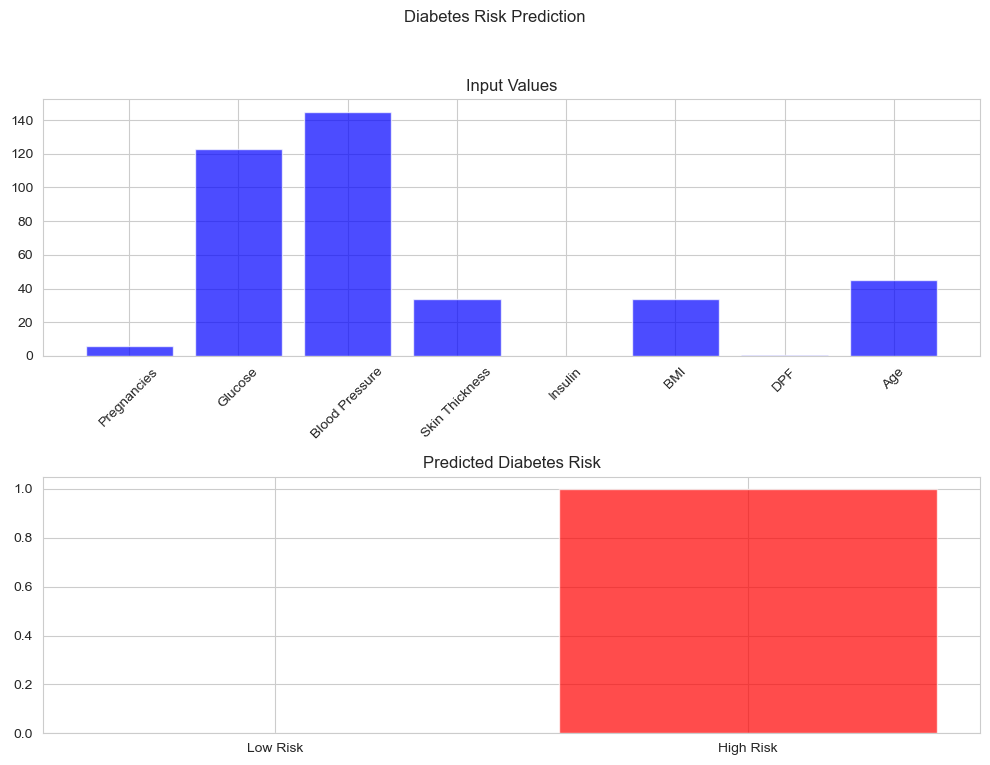


Prediction: Your risk of diabetes is low. No immediate concern.


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the model
model_path = "/Users/shikarichacha/Desktop/PROJECT /diabetes/rnn_model.pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Function to predict diabetes risk and message
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    features = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    features = np.reshape(features, (features.shape[0], 1, features.shape[1]))
    prediction = model.predict(features)
    if prediction == 1:
        return prediction, "You have a high risk of diabetes. Please consult a doctor."
    else:
        return prediction, "Your risk of diabetes is low. No immediate concern."

# Get user inputs
print("Enter the following information to predict your diabetes risk:")
pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

# Predict
prediction, message = predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)

# Create plots
fig, axs = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Diabetes Risk Prediction')

# Input values
labels = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'DPF', 'Age']
x = np.arange(len(labels))
input_values = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]
axs[0].bar(x, input_values, color='b', alpha=0.7)
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, rotation=45)
axs[0].set_title('Input Values')

# Predicted graph
risk_range = [0, 1]  # Example range for risk
axs[1].bar(['Low Risk', 'High Risk'], [1-prediction[0][0], prediction[0][0]], color='r', alpha=0.7)
axs[1].set_title('Predicted Diabetes Risk')

# Show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display prediction message
print("\nPrediction:", message)


Enter the following information to predict your diabetes risk:
Pregnancies: 5
Glucose: 123
Blood Pressure: 156
Skin Thickness: 34
Insulin: 0
BMI: 33
Diabetes Pedigree Function: 0.677
Age: 60
1/1 [==============================] - 0s 129ms/step


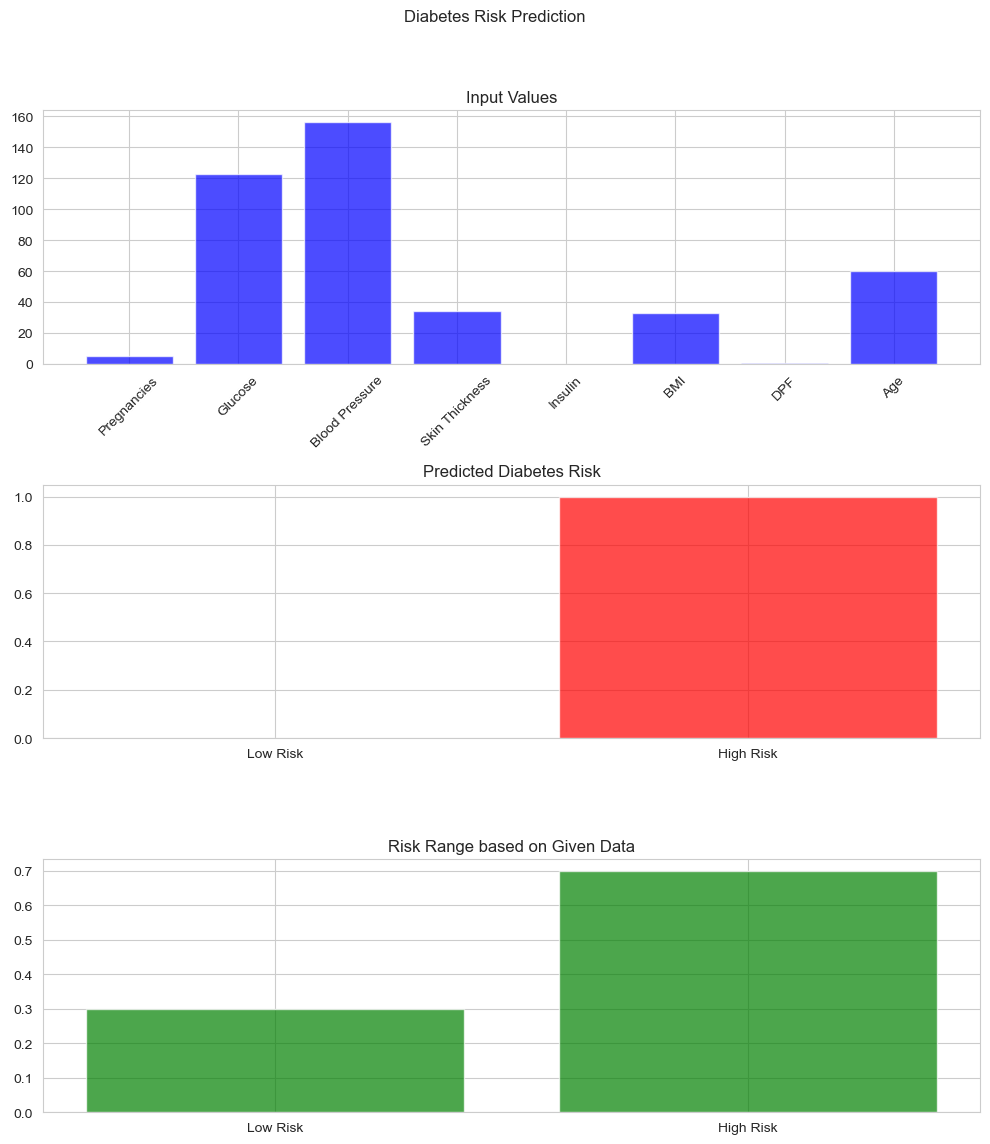


Prediction: Your risk of diabetes is low. No immediate concern.


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the model
model_path = "/Users/shikarichacha/Desktop/PROJECT /diabetes/rnn_model.pkl"
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Function to predict diabetes risk and message
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    features = np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]])
    features = np.reshape(features, (features.shape[0], 1, features.shape[1]))
    prediction = model.predict(features)
    if prediction == 1:
        return prediction, "You have a high risk of diabetes. Please consult a doctor."
    else:
        return prediction, "Your risk of diabetes is low. No immediate concern."

# Get user inputs
print("Enter the following information to predict your diabetes risk:")
pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

# Predict
prediction, message = predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age)

# Create plots
fig, axs = plt.subplots(3, figsize=(10, 12))
fig.suptitle('Diabetes Risk Prediction')

# Input values
labels = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'DPF', 'Age']
x = np.arange(len(labels))
input_values = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]
axs[0].bar(x, input_values, color='b', alpha=0.7)
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, rotation=45)
axs[0].set_title('Input Values')

# Predicted graph
risk_range = [0, 1]  # Example range for risk
axs[1].bar(['Low Risk', 'High Risk'], [1-prediction[0][0], prediction[0][0]], color='r', alpha=0.7)
axs[1].set_title('Predicted Diabetes Risk')

# Show risk range based on given data
axs[2].bar(['Low Risk', 'High Risk'], [0.3, 0.7], color='g', alpha=0.7)
axs[2].set_title('Risk Range based on Given Data')

# Show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Display prediction message
print("\nPrediction:", message)
